# Ingesting US CDC BRFSS Annual Survey Data

### Data Assets Required:

https://www.cdc.gov/brfss/annual_data/annual_2019.html

1) From the above page, under 'Data Files', get survey data. It's in ASCII fixed record length format.
2) Under 'Data Files', get the Variable Layout information. This contains the layout format for each year's ASCII file. I've cut and paste the table as a CSV file (with headers) for import later.
3) Under 'Survey Data Information', get the Codebook to cross-reference the column names against the actual questions and the coded response options. (for e.g. 1-Yes, 2-No, 7-Unsure, 9-Refused to answer)
4) Additionally, on the left bar, you can click 'Questionnaires' to see the full interview question sets, for a better understanding of the survey.
5) This file is written to only pull from surveys conducted in odd years (2019, 2017, ...) due to the rotating nature of the question sets. We needed column responses that were from these questionnaire versions.
6) Column names may differ slightly year-on-year, e.g. 'DIABETE3' vs 'DIABETE4', therefore please refer to the corresponding codebook to ensure column names are correct when ingesting and collating.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 50
pd.options.display.max_columns = 350
pd.options.display.float_format = "{:.2f}".format

In [3]:
# READ IN FILE LAYOUT FORMAT FOR COLUMN SPECIFICATIONS
# Dataset is in fixed width text format, with layout shown here: https://www.cdc.gov/brfss/annual_data/2019/llcp_varlayout_19_onecolumn.html
# Table saved to a CSV for import
# Layout numbers start from text column 1, whereas colspec array to be passed into pandas fixed width file reader start from 0, so subtract by 1
# colspec requires tuple list of start column, end column, for each variable i.e [(0,1),(2,3)...]

fwf_format = pd.read_csv('./data/cdc2019/2019-fwf.csv', header=0, index_col=None)
fwf_widths = fwf_format['Field Length']
fwf_startcol = fwf_format['Starting Column']
fwf_endcol = fwf_format['Starting Column'] + fwf_format['Field Length']
fwf_colspecs = tuple(zip(fwf_startcol-1,fwf_endcol-1))
# print(fwf_colspecs)


In [4]:
# READ IN DATASET (typically takes about 1 min on my machine)
brfss_2019_dataset = pd.read_fwf('./data/cdc2019/LLCP2019.ASC_', colspecs=fwf_colspecs, header=None, index_col=None)
brfss_2019_dataset.columns = fwf_format['Variable Name']
brfss_2019_dataset.columns.name = '' # just resetting the index header name, because it interprets the layout excel file header 'Variable Name' as columns.name
brfss_2019_dataset.reset_index()

,index,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHONE,LADULT1,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK2,TOLDHI2,CHOLMED2,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD2,ADDEPEV3,CHCKDNY2,DIABETE4,DIABAGE3,HAVARTH4,ARTHEXER,ARTHEDU,LMTJOIN3,ARTHDIS2,JOINPAI2,MARITAL,EDUCA,RENTHOM1,NUMHHOL3,NUMPHON3,CPDEMO1B,VETERAN3,EMPLOY1,CHILDREN,INCOME2,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK3,DRNK3GE5,MAXDRNKS,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,FLUSHOT7,FLSHTMY3,TETANUS1,PNEUVAC4,HIVTST7,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN1,BLDSUGAR,FEETCHK3,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM1,DIABEYE,DIABEDU,TOLDCFS,HAVECFS,WORKCFS,TOLDHEPC,TRETHEPC,PRIRHEPC,HAVEHEPC,HAVEHEPB,MEDSHEPB,HPVADVC3,HPVADSHT,IMFVPLA1,SHINGLE2,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PCPSAAD3,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDEC1,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,HLTHCVR1,ASPIRIN,HOMBPCHK,HOMRGCHK,WHEREBP,SHAREBP,WTCHSALT,DRADVISE,INDORTAN,NUMBURN3,SUNPRTCT,WKDAYOUT,WKENDOUT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,CAREGIV1,CRGVREL3,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,PFPPRVN3,TYPCNTR8,NOBCUSE7,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,MARIJAN1,USEMRJN2,RSNMRJN1,FOODSTMP,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH2,_RFCHOL2,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_LMTACT2,_LMTWRK2,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_TOTINDA,METVL11_,METVL21_,MAXVO21_,FC601_,ACTIN12_,ACTIN22_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS2_,PAMIN12_,PAMIN22_,PA2MIN_,PAVIG12_,PAVIG22_,PA2VIGM_,_PACAT2,_PAINDX2,_PA150R3,_PA300R3,_PA30022,_PASTRNG,_PAREC2,_PASTAE2,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_FLSHOT7,_PNEUMO3,_AIDTST4
0,0,1,1,1182019,1,18,2019,1100,2019000001,2019000001,1.00,1.00,NaN,1.00,2.00,1.00,NaN,1.00,2.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3.00,15.00,88.00,88.00,1.00,1.00,2.00,1.00,1.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,2.00,NaN,2.00,2.00,2.00,2.00,2.00,3.00,NaN,1.00,1.00,2.00,1.00,2.00,7.00,2.00,3.00,2.00,1.00,2.00,1.00,2.00,7.00,88.00,3.00,154.00,502.00,NaN,2.00,2.00,2.00,1.00,2.00,2.00,1.00,3.00,NaN,7.00,3.00,888.00,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,210.00,102.00,555.00,302.00,201.00,203.00,315.00,2.00,NaN,4.00,1.00,2.00,NaN,2.00,1.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,3.00,4.00,NaN,4.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,2.00,2.00,2.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

#### SELECT SPECIFIC COLUMNS FOR ANALYSIS

In [138]:
brfss_df_selected = brfss_2019_dataset[[
    'DIABETE4','_RFHYPE5', '_BMI5', 'SMOKE100', 'CVDSTRK3', '_MICHD', '_TOTINDA', '_FRTLT1A', '_VEGLT1A', '_RFDRHV7', '_RFCHOL2', 'HLTHPLN1', 'MEDCOST', 'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', '_SEX', '_AGEG5YR', 'EDUCA', 'INCOME2', # ORIGINAL COLUMNS
    'PNEUVAC4', 'CVDCRHD4', 'CVDINFR4', 'HAVARTH4', 'CHCKDNY2', 'DIFFALON', 'DIFFDRES', 'CHCCOPD2', 'CHECKUP1', 'EXERANY2', 'ALCDAY5']]

In [139]:
brfss_df_selected.shape

(418268, 32)

In [140]:
# DROP MISSING VALUES
brfss_df_selected = brfss_df_selected.dropna()
brfss_df_selected.shape

(315035, 32)

#### DATA CLEANING ON THE FOLLOWING COLUMN RESPONSES, AS PER CODEBOOK:

In [141]:
# DIABETE4 : ORIGINAL  [1-YES | 2-YES, FEMALE, DURING PREGNANCY | 3-NO | 4-PREDIAB/BORDERLINE | 7-UNSURE | 9-REFUSED | BLANK-MISSING ]
# DIABETE4 : CONVERTED [0-NO | 1-YES] (deleted 7 and 9)
brfss_df_selected['DIABETE4'] = brfss_df_selected['DIABETE4'].replace({2:0, 3:0, 4:0, 1:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['DIABETE4'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['DIABETE4'] != 9]
print(f"DIABETE4 : {np.sort(brfss_df_selected['DIABETE4'].unique())} ")

DIABETE4 : [0. 1.] 


In [142]:
# _RFHYPE5 (HIGH BP): ORIGINAL  [1-NO | 2-YES | 7 OR 9-DK/REFUSED/MISSING ]
# _RFHYPE5 (HIGH BP): CONVERTED [0-NO | 1-YES] (DELETED OTHERS)
#Change 1 to 0 so it represetnts No high blood pressure and 2 to 1 so it represents high blood pressure
brfss_df_selected['_RFHYPE5'] = brfss_df_selected['_RFHYPE5'].replace({1:0, 2:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['_RFHYPE5'] != 9]
print(f"_RFHYPE5 : {np.sort(brfss_df_selected['_RFHYPE5'].unique())} ")

_RFHYPE5 : [0 1] 


In [143]:
# _BMI5 : ORIGINAL  [BMI * 100. So for example a BMI of 4018 is really 40.18] [BLANK-MISSING]
# _BMI5 : CONVERTED [ _/100 AND ROUNDED OFF]
brfss_df_selected['_BMI5'] = brfss_df_selected['_BMI5'].div(100).round(0)
print(f"_BMI5 : {np.sort(brfss_df_selected._BMI5.unique())} ")

_BMI5 : [ 12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.
  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.
  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.
  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.
  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.
  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  94.  95.  96.
  97.  98.  99. 100.] 


In [144]:
# SMOKE100 : ORIGINAL  [1-YES | 2-NO | 7-UNSURE | 9-REFUSED | BLANK-MISSING]
# SMOKE100 : CONVERTED [1-YES | 0-NO] (DELETED OTHERS)
brfss_df_selected['SMOKE100'] = brfss_df_selected['SMOKE100'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected.SMOKE100 != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected.SMOKE100 != 9]
print(f"SMOKE100 : {np.sort(brfss_df_selected['SMOKE100'].unique())} ")

SMOKE100 : [0. 1.] 


In [145]:
# CVDSTRK3 (STROKE) : ORIGINAL  [1-YES | 2-NO | 7-UNSURE | 9-REFUSED | BLANK-MISSING]
# CVDSTRK3 (STROKE) : CONVERTED [1-YES | 0-NO] (DELETED OTHERS)
brfss_df_selected['CVDSTRK3'] = brfss_df_selected['CVDSTRK3'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['CVDSTRK3'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['CVDSTRK3'] != 9]
print(f"CVDSTRK3 : {np.sort(brfss_df_selected['CVDSTRK3'].unique())} ")

CVDSTRK3 : [0. 1.] 


In [146]:
# _MICHD (heart disease/myocardial infarction) : ORIGINAL  [1-YES | 2-NO | 7-UNSURE | 9-REFUSED | BLANK-MISSING]
# _MICHD (heart disease/myocardial infarction) : CONVERTED [1-YES | 0-NO] (DELETED OTHERS)
brfss_df_selected['_MICHD'] = brfss_df_selected['_MICHD'].replace({2: 0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._MICHD != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected._MICHD != 9]
print(f"_MICHD : {np.sort(brfss_df_selected['_MICHD'].unique())} ")

_MICHD : [0. 1.] 


In [147]:
# _TOTINDA (EXERCISE) : ORIGINAL  [1-YES | 2-NO | 7-UNSURE | 9-REFUSED | BLANK-MISSING]
# _TOTINDA (EXERCISE) : CONVERTED [1-YES | 0-NO] (DELETED OTHERS)
brfss_df_selected['_TOTINDA'] = brfss_df_selected['_TOTINDA'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected._TOTINDA != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected._TOTINDA != 9]
print(f"_TOTINDA : {np.sort(brfss_df_selected['_TOTINDA'].unique())} ")

_TOTINDA : [0 1] 


In [148]:
# _FRTLT1A (FRUITS) : ORIGINAL  [1-YES | 2-NO | 7-UNSURE | 9-REFUSED | BLANK-MISSING] 
# _FRTLT1A (FRUITS) : CONVERTED [1-YES | 0-NO] (DELETED OTHERS)
brfss_df_selected['_FRTLT1A'] = brfss_df_selected['_FRTLT1A'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['_FRTLT1A'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['_FRTLT1A'] != 9]
print(f"_FRTLT1A : {np.sort(brfss_df_selected['_FRTLT1A'].unique())} ")

_FRTLT1A : [0 1] 


In [149]:
# _VEGLT1A (VEG) : ORIGINAL  [1-YES | 2-NO | 7-UNSURE | 9-REFUSED | BLANK-MISSING] 
# _VEGLT1A (VEG) : CONVERTED [1-YES | 0-NO] (DELETED OTHERS)
brfss_df_selected['_VEGLT1A'] = brfss_df_selected['_VEGLT1A'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['_VEGLT1A'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['_VEGLT1A'] != 9]
print(f"_VEGLT1A : {np.sort(brfss_df_selected['_VEGLT1A'].unique())} ")

_VEGLT1A : [0 1] 


In [150]:
# _RFDRHV7 (heavy drinking) : ORIGINAL  [1-NO | 2-YES | 7-UNSURE | 9-REFUSED | BLANK-MISSING] 
# _RFDRHV7 (heavy drinking) : CONVERTED [1-YES | 0-NO] (DELETED OTHERS)
brfss_df_selected['_RFDRHV7'] = brfss_df_selected['_RFDRHV7'].replace({1:0, 2:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['_RFDRHV7'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['_RFDRHV7'] != 9]
print(f"_RFDRHV7 : {np.sort(brfss_df_selected['_RFDRHV7'].unique())} ")

_RFDRHV7 : [0 1] 


In [151]:
# _RFCHOL2 (High Cholesterol): ORIGINAL  [1-NO | 2-YES | 7 OR 9-DK/REFUSED/MISSING ]
# _RFCHOL2 (High Cholesterol): CONVERTED [0-NO | 1-YES] (DELETED OTHERS)
brfss_df_selected['_RFCHOL2'] = brfss_df_selected['_RFCHOL2'].replace({1:0, 2:1})
brfss_df_selected = brfss_df_selected[brfss_df_selected['_RFCHOL2'] != 9]
print(f"_RFCHOL2 : {np.sort(brfss_df_selected['_RFCHOL2'].unique())} ")

_RFCHOL2 : [0. 1.] 


In [152]:
# HLTHPLN1 : ORIGINAL  [1-YES | 2-NO | 7-UNSURE | 9-REFUSED | BLANK-MISSING] 
# HLTHPLN1 : CONVERTED [1-YES | 0-NO] (DELETED OTHERS)
brfss_df_selected['HLTHPLN1'] = brfss_df_selected['HLTHPLN1'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['HLTHPLN1'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['HLTHPLN1'] != 9]
print(f"HLTHPLN1 : {np.sort(brfss_df_selected['HLTHPLN1'].unique())} ")

HLTHPLN1 : [0. 1.] 


In [153]:
# MEDCOST : ORIGINAL  [1-YES | 2-NO | 7-UNSURE | 9-REFUSED | BLANK-MISSING] 
# MEDCOST : CONVERTED [1-YES | 0-NO] (DELETED OTHERS)
brfss_df_selected['MEDCOST'] = brfss_df_selected['MEDCOST'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['MEDCOST'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['MEDCOST'] != 9]
print(f"MEDCOST : {np.sort(brfss_df_selected['MEDCOST'].unique())} ")

MEDCOST : [0. 1.] 


In [154]:
# GENHLTH : ORIGINAL  [1-EXCELLENT to 5-POOR | 7-UNSURE | 9-REFUSED | BLANK-MISSING] 
# GENHLTH : CONVERTED [1-EXCELLENT to 5-POOR] (DELETED OTHERS)
brfss_df_selected = brfss_df_selected[brfss_df_selected['GENHLTH'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['GENHLTH'] != 9]
print(f"GENHLTH : {np.sort(brfss_df_selected['GENHLTH'].unique())} ")

GENHLTH : [1. 2. 3. 4. 5.] 


In [155]:
# MENTHLTH : ORIGINAL  [1 to 30 DAYS | 88-0 DAYS| 77-UNSURE | 99-REFUSED | BLANK-MISSING]
# MENTHLTH : ORIGINAL  [0 to 30 DAYS ] (DELETED OTHERS)
# change 88 to 0 because it means none (no bad mental health days)
brfss_df_selected['MENTHLTH'] = brfss_df_selected['MENTHLTH'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['MENTHLTH'] != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected['MENTHLTH'] != 99]
print(f"MENTHLTH : {np.sort(brfss_df_selected['MENTHLTH'].unique())} ")

MENTHLTH : [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.] 


In [156]:
# PHYSHLTH : ORIGINAL  [1 to 30 DAYS | 88-0 DAYS| 77-UNSURE | 99-REFUSED | BLANK-MISSING]
# PHYSHLTH : ORIGINAL  [0 to 30 DAYS ] (DELETED OTHERS)
# change 88 to 0 because it means none (no bad physical health days)
brfss_df_selected['PHYSHLTH'] = brfss_df_selected['PHYSHLTH'].replace({88:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['PHYSHLTH'] != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected['PHYSHLTH'] != 99]
print(f"PHYSHLTH : {np.sort(brfss_df_selected['PHYSHLTH'].unique())} ")

PHYSHLTH : [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.] 


In [157]:
# DIFFWALK : ORIGINAL  [1-YES | 2-NO | 7-UNSURE | 9-REFUSED | BLANK-MISSING] 
# DIFFWALK : CONVERTED [1-YES | 0-NO] (DELETED OTHERS)
brfss_df_selected['DIFFWALK'] = brfss_df_selected['DIFFWALK'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['DIFFWALK'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['DIFFWALK'] != 9]
print(f"DIFFWALK : {np.sort(brfss_df_selected['DIFFWALK'].unique())} ")

DIFFWALK : [0. 1.] 


In [158]:
# _SEX : ORIGINAL  [1-MALE | 2-FEMALE | 7-UNSURE | 9-REFUSED | BLANK-MISSING] 
# _SEX : CONVERTED [1-MALE | 0-FEMALE] (DELETED OTHERS)
brfss_df_selected['_SEX'] = brfss_df_selected['_SEX'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['_SEX'] != 9]
print(f"_SEX : {np.sort(brfss_df_selected['_SEX'].unique())} ")

_SEX : [0 1] 


In [159]:
# _AGEG5YR : ORIGINAL [1- 18-24YO | 2- 25-29YO | ... | 13- 80 AND OLDER | 14-DK/MISSING] (5 YR INCREMENTS)
# _AGEG5YR : JUST REMOVED 14.
brfss_df_selected = brfss_df_selected[brfss_df_selected['_AGEG5YR'] != 14]
print(f"_AGEG5YR : {np.sort(brfss_df_selected['_AGEG5YR'].unique())} ")

_AGEG5YR : [ 1  2  3  4  5  6  7  8  9 10 11 12 13] 


In [160]:
# EDUCA : ORIGINAL [1 (KINDERGARTEN) - 6 (COLLEGE GRAD) SCALE | 9-REFUSED]
brfss_df_selected = brfss_df_selected[brfss_df_selected.EDUCA != 9]
print(f"EDUCA : {np.sort(brfss_df_selected.EDUCA.unique())} ")

EDUCA : [1. 2. 3. 4. 5. 6.] 


In [161]:
# INCOME2 : ORIGINAL [1 (<$10K) - 8 (>$75K) SCALE | 77-UNSURE | 99-REFUSED]
brfss_df_selected = brfss_df_selected[brfss_df_selected.INCOME2 != 77]
brfss_df_selected = brfss_df_selected[brfss_df_selected.INCOME2 != 99]
print(f"INCOME2 : {np.sort(brfss_df_selected.INCOME2.unique())} ")

INCOME2 : [1. 2. 3. 4. 5. 6. 7. 8.] 


In [162]:
# ADDITIONAL COLUMNS

# PNEUVAC4 : ORIGINAL  [1-YES | 2-NO | 7-UNSURE | 9-REFUSED | BLANK-MISSING] 
# PNEUVAC4 : CONVERTED [1-YES | 0-NO] (DELETED OTHERS)
brfss_df_selected['PNEUVAC4'] = brfss_df_selected['PNEUVAC4'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['PNEUVAC4'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['PNEUVAC4'] != 9]
print(f"PNEUVAC4 : {np.sort(brfss_df_selected['PNEUVAC4'].unique())} ")

PNEUVAC4 : [0. 1.] 


In [163]:
# CVDCRHD4 : ORIGINAL  [1-YES | 2-NO | 7-UNSURE | 9-REFUSED | BLANK-MISSING] 
# CVDCRHD4 : CONVERTED [1-YES | 0-NO] (DELETED OTHERS)
brfss_df_selected['CVDCRHD4'] = brfss_df_selected['CVDCRHD4'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['CVDCRHD4'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['CVDCRHD4'] != 9]
print(f"CVDCRHD4 : {np.sort(brfss_df_selected['CVDCRHD4'].unique())} ")

CVDCRHD4 : [0. 1.] 


In [164]:
# CVDINFR4 : ORIGINAL  [1-YES | 2-NO | 7-UNSURE | 9-REFUSED | BLANK-MISSING] 
# CVDINFR4 : CONVERTED [1-YES | 0-NO] (DELETED OTHERS)
brfss_df_selected['CVDINFR4'] = brfss_df_selected['CVDINFR4'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['CVDINFR4'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['CVDINFR4'] != 9]
print(f"CVDINFR4 : {np.sort(brfss_df_selected['CVDINFR4'].unique())} ")

CVDINFR4 : [0. 1.] 


In [165]:
# HAVARTH4 : ORIGINAL  [1-YES | 2-NO | 7-UNSURE | 9-REFUSED | BLANK-MISSING] 
# HAVARTH4 : CONVERTED [1-YES | 0-NO] (DELETED OTHERS)
brfss_df_selected['HAVARTH4'] = brfss_df_selected['HAVARTH4'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['HAVARTH4'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['HAVARTH4'] != 9]
print(f"HAVARTH4 : {np.sort(brfss_df_selected['HAVARTH4'].unique())} ")

HAVARTH4 : [0. 1.] 


In [166]:
# CHCKDNY2 : ORIGINAL  [1-YES | 2-NO | 7-UNSURE | 9-REFUSED | BLANK-MISSING] 
# CHCKDNY2 : CONVERTED [1-YES | 0-NO] (DELETED OTHERS)
brfss_df_selected['CHCKDNY2'] = brfss_df_selected['CHCKDNY2'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['CHCKDNY2'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['CHCKDNY2'] != 9]
print(f"CHCKDNY2 : {np.sort(brfss_df_selected['CHCKDNY2'].unique())} ")

CHCKDNY2 : [0. 1.] 


In [167]:
# DIFFALON : ORIGINAL  [1-YES | 2-NO | 7-UNSURE | 9-REFUSED | BLANK-MISSING] 
# DIFFALON : CONVERTED [1-YES | 0-NO] (DELETED OTHERS)
brfss_df_selected['DIFFALON']       = brfss_df_selected['DIFFALON'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['DIFFALON'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['DIFFALON'] != 9]
print(f"DIFFALON : {np.sort(brfss_df_selected['DIFFALON'].unique())} ")

DIFFALON : [0. 1.] 


In [168]:
# DIFFDRES : ORIGINAL  [1-YES | 2-NO | 7-UNSURE | 9-REFUSED | BLANK-MISSING] 
# DIFFDRES : CONVERTED [1-YES | 0-NO] (DELETED OTHERS)
brfss_df_selected['DIFFDRES']       = brfss_df_selected['DIFFDRES'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['DIFFDRES'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['DIFFDRES'] != 9]
print(f"DIFFDRES : {np.sort(brfss_df_selected['DIFFDRES'].unique())} ")

DIFFDRES : [0. 1.] 


In [169]:
# CHCCOPD2 (chronic obstructive pulmonary disease/emphysema/bronchitis) 
# : ORIGINAL  [1-YES | 2-NO | 7-UNSURE | 9-REFUSED | BLANK-MISSING] 
# : CONVERTED [1-YES | 0-NO] (DELETED OTHERS)
brfss_df_selected['CHCCOPD2']       = brfss_df_selected['CHCCOPD2'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['CHCCOPD2'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['CHCCOPD2'] != 9]
print(f"CHCCOPD2 : {np.sort(brfss_df_selected['CHCCOPD2'].unique())} ")

CHCCOPD2 : [0. 1.] 


In [170]:
# EXERANY2 : ORIGINAL  [1-YES | 2-NO | 7-UNSURE | 9-REFUSED | BLANK-MISSING] 
# EXERANY2 : CONVERTED [1-YES | 0-NO] (DELETED OTHERS)
brfss_df_selected['EXERANY2'] = brfss_df_selected['EXERANY2'].replace({2:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['EXERANY2'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['EXERANY2'] != 9]
print(f"EXERANY2 : {np.sort(brfss_df_selected['EXERANY2'].unique())} ")

EXERANY2 : [0. 1.] 


In [171]:
# ALCDAY5  : ORIGINAL  [1-231-YES | 888-NO | 7-UNSURE | 9-REFUSED | BLANK-MISSING]
# 2 types of answers: how many days a week, add prefix 1.  i.e 102 for 2 days a week
#                     how many days a month, add prefix 2. i.e 215 for 15 days a month
# ALCDAY5  : CONVERTED [1-YES | 0-NO] (DELETED OTHERS)
brfss_df_selected['ALCDAY5'] = brfss_df_selected['ALCDAY5'].replace({888:0})
brfss_df_selected = brfss_df_selected[brfss_df_selected['ALCDAY5'] != 7]
brfss_df_selected = brfss_df_selected[brfss_df_selected['ALCDAY5'] != 9]

# Use a dict to map values
sel = [101,102,103,104,105,106,107, 201,202,203,204,205,206,207,208,209,210,211 212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230]
cnv = [  4,  8, 12, 16, 20, 24, 28,   1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
dct = dict(zip(sel, cnv))

brfss_df_selected.loc[brfss_df_selected.ALCDAY5.isin(sel), 'ALCDAY5'] = brfss_df_selected['ALCDAY5'].map(dct)
print(f"ALCDAY5 : {np.sort(brfss_df_selected['ALCDAY5'].unique())} ")

ALCDAY5 : [  0. 101. 102. 103. 104. 105. 106. 107. 201. 202. 203. 204. 205. 206.
 207. 208. 209. 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220.
 221. 222. 223. 224. 225. 226. 227. 228. 229. 230.] 


In [179]:
brfss_df_selected.corr()[["DIABETE4"]].sort_values("DIABETE4", ascending=False)

,DIABETE4
,
DIABETE4,1.00
GENHLTH,0.28
_RFHYPE5,0.26
_BMI5,0.21
DIFFWALK,0.21
_RFCHOL2,0.20
_AGEG5YR,0.18
PNEUVAC4,0.18
PHYSHLTH,0.17


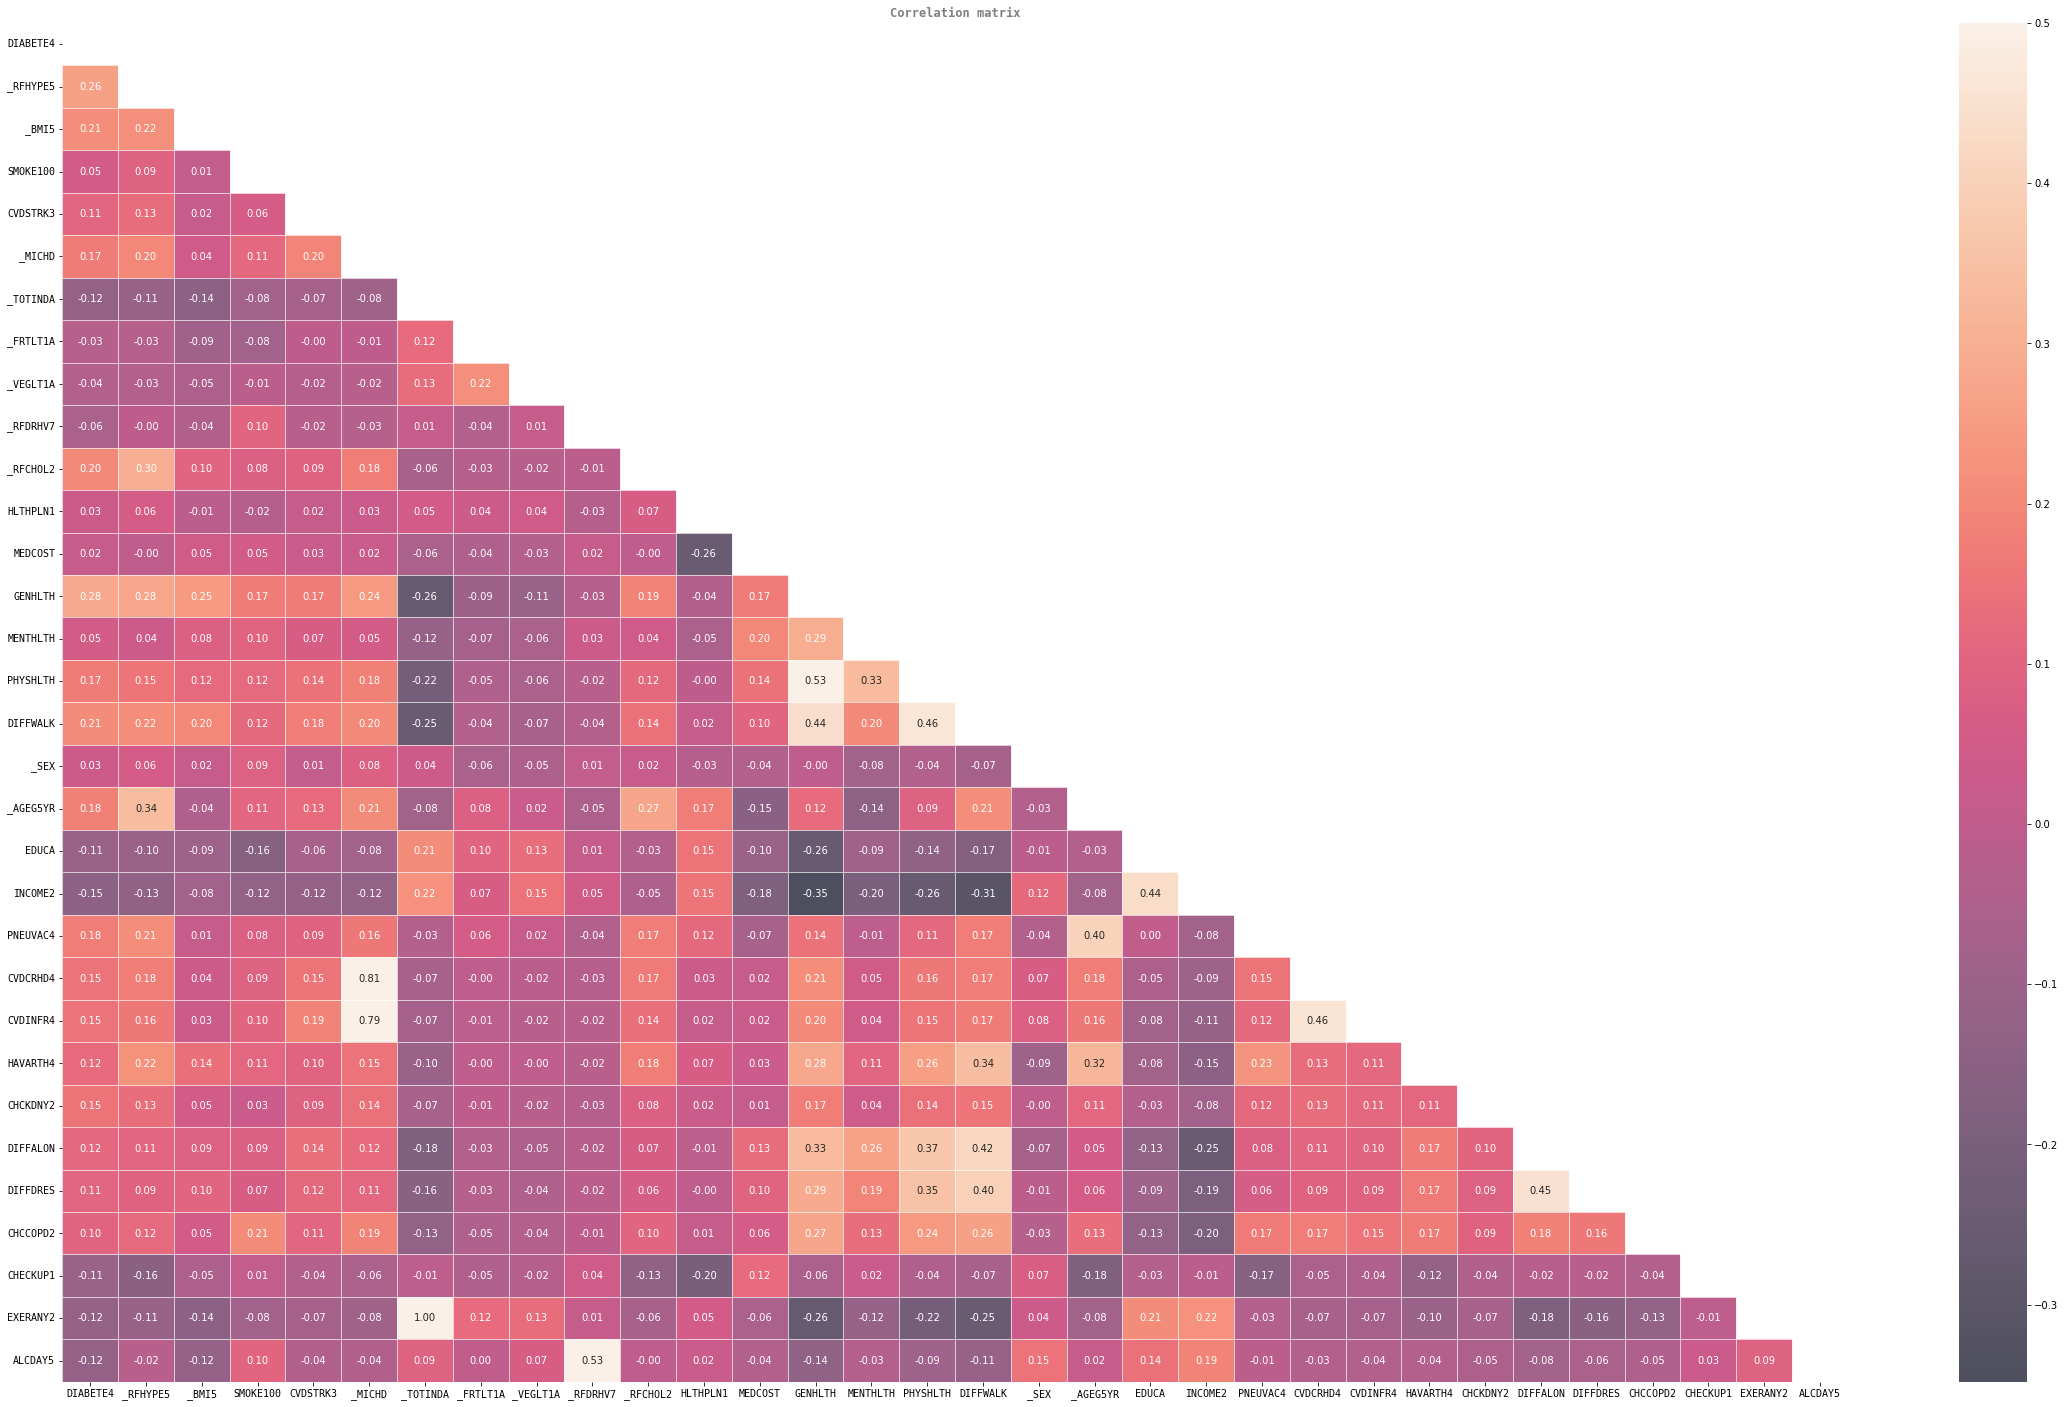

In [180]:
plt.figure(figsize=(40,25))

corr = brfss_df_selected.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            mask = mask,
            #cmap = 'autumn',
            vmax =0.5,
            annot = True,
            linewidths = 0.5,
            fmt = ".2f",
            alpha = 0.7)
hfont = {'fontname':'monospace'}
plt.xticks(**hfont)
plt.yticks(**hfont)
plt.title('Correlation matrix',
          family = 'monospace',
          fontsize = 12,
          weight = 'semibold',
          color = 'grey')

plt.show()

In [182]:
#Rename the columns to make them more readable
brfss = brfss_df_selected.rename(columns = {'DIABETE4':'Diabetes_binary', 'ALCDAY5' :'AlcoholDays',
                                            '_RFHYPE5':'HighBP',          '_BMI5':'BMI', 
                                            '_RFCHOL2':'HighChol',        'SMOKE100':'Smoker', 
                                            'CVDSTRK3':'Stroke',          '_MICHD':'HeartDiseaseorAttack', 
                                            '_TOTINDA':'PhysActivity',    '_FRTLT1A':'Fruits', 
                                            '_VEGLT1A':"Veggies",         '_RFDRHV7':'HvyAlcoholConsump', 
                                            'HLTHPLN1':'AnyHealthcare',   'MEDCOST':'NoDocbcCost', 
                                            'GENHLTH':'GenHlth',          'MENTHLTH':'MentHlth', 
                                            'PHYSHLTH':'PhysHlth',        'DIFFWALK':'DiffWalk', 
                                            '_SEX':'Sex',                 '_AGEG5YR':'Age', 
                                            'EDUCA':'Education',          'INCOME2':'Income',
                                            'PNEUVAC4':'PneumoniaVacc',   'CVDCRHD4':'HeartDis', 
                                            'CVDINFR4':'HeartAttk',       'HAVARTH4':'Arthritis', 
                                            'CHCKDNY2':'KidneyDis',       'DIFFALON':'DiffAlone', 
                                            'DIFFDRES':'DiffDress',       'CHCCOPD2':'PulmonaryDis', 
                                            'CHECKUP1':'LastCheckup',     'EXERANY2':'AnyExercise' })

In [183]:
# Export cleaned dataset
brfss.to_csv('./exports/diabetes_v2_2019.csv', sep=",", index=False)

#### Manage class imbalance via undersampling

In [185]:
#Check Class Sizes of the diabetes column
brfss_df_selected.groupby(['DIABETE4']).size()

DIABETE4
0.00    187749
1.00     33006
dtype: int64

In [186]:
# Manage Class Imbalance
#Separate the 0(No Diabetes) and 1&2(Pre-diabetes and Diabetes)
#Get the 1s
is1 = brfss['Diabetes_binary'] == 1
brfss_5050_1 = brfss[is1]

#Get the 0s
is0 = brfss['Diabetes_binary'] == 0
brfss_5050_0 = brfss[is0] 

In [187]:
#Select the 33006 random cases from the 0 (non-diabetes group). we already have 33006 cases from the diabetes risk group
brfss_5050_0_rand1 = brfss_5050_0.take(np.random.permutation(len(brfss_5050_0))[:33006])

#Append the 33006 1s to the 33006 randomly selected 0s
brfss_5050 = brfss_5050_0_rand1.append(brfss_5050_1, ignore_index = True)

In [188]:
# Check it worked
brfss_5050.groupby(['Diabetes_binary']).size()

Diabetes_binary
0.00    33006
1.00    33006
dtype: int64

In [189]:
# Save to CSV
brfss_5050.to_csv('./exports/diabetes_v2_2019_5050split.csv', sep=",", index=False)